# Sympy - Python中的符号代数

## 1. 简介

SymPy 是一个由 Python 语言编写的符号计算库。处理数学对象的计算称为符号计算，在符号计算中，数学对象是精确表示的，而不是近似的，未计算的数学表达式会以符号形式保留；与符号计算相对应的是数值计算。

![cover](images/sympy.png)

有两个比较有名的Python计算机代数系统（CAS）:

* [SymPy](http://sympy.org/en/index.html) - 这是一个python模块可以被用在任意的Python程序或者是IPython会话中，它提供了强大的计算机代数系统（CAS）特征。
* [Sage](http://www.sagemath.org/) - Sage 是一个全功能的且非常强大的CAS环境，它的目的是提供一个与Mathematica和Maple竞争的开源系统。Sage并不是一个常规的Python模块，而是一个CAS环境用Python作为其编程语言。

Sage在某些方面比SymPy更加强大，但是他们都提供非常完善的CAS功能。SymPy的优点是，它是一个常规的Python模块而且和IPython notebook集成的很好。

为了开始在Python程序或笔记本中使用SymPy，首先导入模块`sympy`:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import sympy as sp

为了得到一个看起来更好的$\LaTeX$格式输出运行：

In [3]:
sp.init_printing()

# 或者使用较旧版本的sympy/ipython，加载ipython扩展
#%load_ext sympy.interactive.ipythonprinting
# 或者
#%load_ext sympyprinting

## 2. 符号变量

在SymPy中需要为需要处理的变量定义为符号，可以创建一个新的符号用`Symbol`类：

In [3]:
x = sp.Symbol('x')

In [4]:
(sp.pi + x)**2

In [12]:
# 定义符号的可替代的方式
a, b, c = sp.symbols("a, b, c")

In [6]:
type(a)

sympy.core.symbol.Symbol

在定义符号的时候，可以给其设置属性，例如：

In [6]:
x = sp.Symbol('x', real=True)

In [8]:
x.is_imaginary

False

In [9]:
x = sp.Symbol('x', positive=True)

In [10]:
x > 0

### 2.1 复数

虚数单位在Sympy中被记做`I`。

In [11]:
1+1*sp.I

In [12]:
sp.I**4

In [13]:
(x * sp.I + 1)**2

### 2.2 有理数

在SymPy中有三个不同的数学表达形式`Real`, `Rational`, `Integer`:

In [14]:
r1 = sp.Rational(4,5)
r2 = sp.Rational(5,4)

In [15]:
r1

In [16]:
r1+r2

In [17]:
r1/r2

## 3 数值评估

`SymPy`使用任意精度的库作为数值后端，而且预定义了许多数学常数，例如：`pi`, `e`,和用`oo`代表无限。

为了数值地衡量一个表达，可以用`evalf`方程（或者`N`），它使用了一个参数`n`确定了有效数字的数量。

In [4]:
sp.pi.evalf(n=5000)

In [7]:
y = (x + sp.pi)**2

In [8]:
sp.N(y, 5) # 和evalf 一样

当给符号赋予一个确定的数值的，可以使用 `subs` 函数：

In [9]:
y.subs(x, 1.5)

In [10]:
sp.N(y.subs(x, 1.5))

`subs`当然也可以被用来代入符号和表达：

In [13]:
y.subs(x, a+sp.pi)

也可以将表达式的数值演化和NumPy数组结合：

In [14]:
import numpy as np

In [15]:
x_vec = np.arange(0, 10, 0.1)

In [16]:
y_vec = np.array([sp.N(((x + sp.pi)**2).subs(x, xx)) for xx in x_vec])

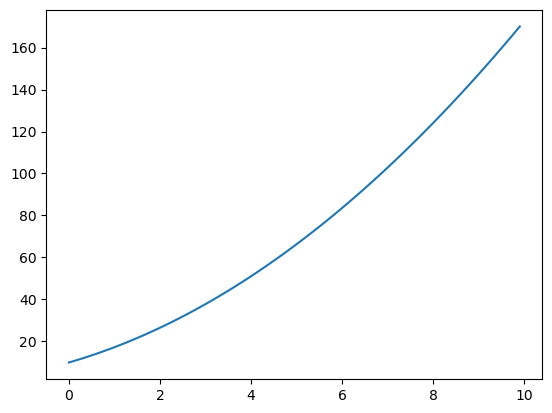

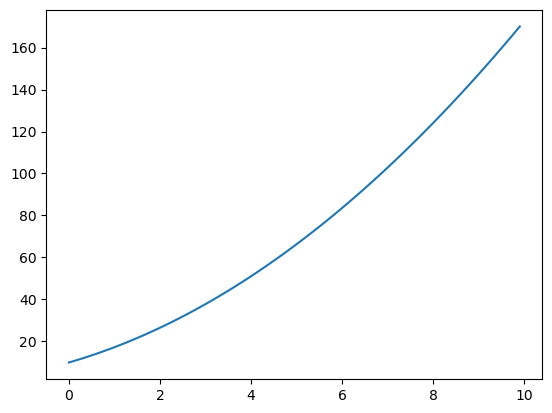

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x_vec, y_vec)
plt.show()

然而，这个类型的数值计算会是非常慢的，有一种非常有效的方式去做：使用函数 `lambdify` 去“编译”一个SymPy表达并代入函数再进行数值计算是非常高效的。

In [19]:
f = sp.lambdify([x], (x + sp.pi)**2, 'numpy')  # 第一个参数是一个变量列表
                                         # f将是以下函数的函数:本例中仅为x -> f(x)

In [20]:
y_vec = f(x_vec)  # 现在我们可以之间传入一个numpy数组而f(x)会被更有效地计算

在使用上述加速的实现，而不是直接的进行数值计算时的加速是非常重要的，通常相差几个数量级。即使在简单的例子中也会得到一个明显的加速：

In [22]:
%%timeit

pi = sp.pi
y_vec = np.array([sp.N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

6.76 ms ± 76.4 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
%%timeit

y_vec = f(x_vec)

1.15 μs ± 6.37 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## 4. 代数操作

CAS的一个主要用处是执行表达的代数操作。例如，我们可能想要展开一个乘积，一个表达式的因式，或者只是一个表达式。在本节中演示SymPy中进行这些基本操作的功能。

### 4.1 展开和乘积

代数操作中的第一步：

In [24]:
(x+1)*(x+2)*(x+3)

In [25]:
sp.expand((x+1)*(x+2)*(x+3))

`expand`函数有一些关键字参数，可以告诉函数我们想要执行什么样的扩展。例如，为了扩展三角函数表达式，用`trig=True`的关键字参数：

In [26]:
sp.sin(a+b)

In [27]:
sp.expand(sp.sin(a+b), trig=True)

有关`expand`函数可以执行的各种扩展类型的详细说明，请参见`help(expand)`。

与乘积展开相反的当然就是因式分解了。在SymPy中用`factor`函数来进行因式分解表达：

In [28]:
sp.factor(x**3 + 6 * x**2 + 11*x + 6)

### 4.2 化简

`simplify`尝试使用不同的技巧，去将表达简化到易懂的形式。也有很多可以替代`simplify`的函数：`trigsimp`, `powsimp`, `logcombine`等等，其基本用法如下：

In [29]:
# simplify 展开乘积
sp.simplify((x+1)*(x+2)*(x+3))

In [30]:
# simplify 使用三角恒等式
sp.simplify(sp.sin(a)**2 + sp.cos(a)**2)

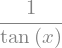

In [31]:
sp.simplify(sp.cos(x)/sp.sin(x))

### 4.3 apart 和 together

为了处理分数的符号表达式，可以用`apart`和`together`函数：

In [32]:
f1 = 1/((a+1)*(a+2))

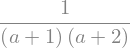

In [33]:
f1

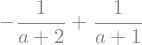

In [34]:
sp.apart(f1)

In [35]:
f2 = 1/(a+2) + 1/(a+3)

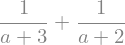

In [36]:
f2

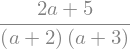

In [37]:
sp.together(f2)

简化通常结合分数但不分解：

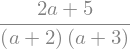

In [38]:
sp.simplify(f2)

## 5 微积分

除了代数操作之外，CAS的另一个主要用途是做微积分，比如代数表达式的导数和积分。

### 5.1 微分

微分通常在sympy中比较简单，可以用`diff`函数，第一个参数是求导的表达式，第二个参数是求导的符号:

In [39]:
y

In [40]:
sp.diff(y**2, x)

对于高阶导数可以这样：

In [41]:
sp.diff(y**2, x, x)

In [42]:
sp.diff(y**2, x, 2) # 和上面的一样

为了计算多变量表达的导数，可以这样做：

In [43]:
x, y, z = sp.symbols("x,y,z")

In [44]:
f = sp.sin(x*y) + sp.cos(y*z)

$\frac{d^3f}{dxdy^2}$

In [45]:
sp.diff(f, x, 1, y, 2)

## 6. 积分

积分也是以同样的方式进行的:

In [46]:
f

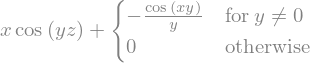

In [47]:
sp.integrate(f, x)

通过提供积分变量的极限，可以计算定积分:

In [48]:
sp.integrate(f, (x, -1, 1))

还有反常积分

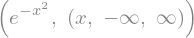

In [49]:
(sp.exp(-x**2), (x, -sp.oo, sp.oo))

记住，`oo`在SymPy中代表无穷。

### 6.1 加数和乘积

可以计算加数和乘积使用函数：`Sum`

In [50]:
n = sp.Symbol("n")

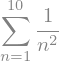

In [51]:
sp.Sum(1/n**2, (n, 1, 10))

In [52]:
sp.Sum(1/n**2, (n,1, 10)).evalf()

In [54]:
sp.Sum(1/n**2, (n, 1, sp.oo)).evalf()

乘积也是以类似的方式进行的:

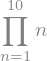

In [55]:
sp.Product(n, (n, 1, 10)) # 10!

## 7. 极限

极限可以用`limit`函数来计算。例如：

In [69]:
sp.limit(sp.sin(x)/x, x, 0)

可以用`limit`去检查`diff`函数的推导结果：

In [85]:
f

In [86]:
sp.diff(f, x)

$\displaystyle \frac{\mathrm{d}f(x,y)}{\mathrm{d}x} = \frac{f(x+h,y)-f(x,y)}{h}$

In [88]:
h = Symbol("h")

In [89]:
sp.limit((f.subs(x, x+h) - f)/h, h, 0)

可以改变方向，从接近极限点使用`dir`关键字参数:

In [90]:
sp.limit(1/x, x, 0, dir="+")

In [91]:
sp.limit(1/x, x, 0, dir="-")

## 8. 序列

系列扩展也是CAS最有用的特性之一。在SymPy中，可以用`series` 函数对表达式进行级数展开:

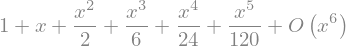

In [70]:
sp.series(sp.exp(x), x)

默认情况下，它在$x=0$附近扩展表达式，但是可以通过在函数调用中显式包含一个值来扩展$x$的任何值:

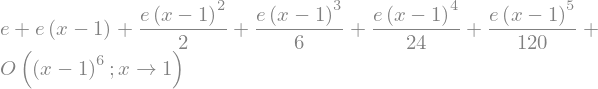

In [71]:
sp.series(sp.exp(x), x, 1)

可以明确定义级数展开的顺序为:

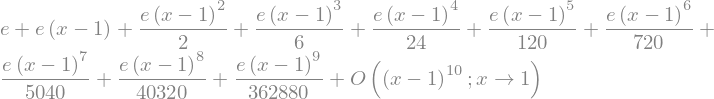

In [72]:
sp.series(sp.exp(x), x, 1, 10)

级数展开式包含了近似的阶数，当对不同阶数的级数展开式进行计算时，这对于跟踪有效性的阶数非常有用:

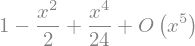

In [97]:
s1 = sp.cos(x).series(x, 0, 5)
s1

In [98]:
s2 = sp.sin(x).series(x, 0, 2)
s2

In [99]:
expand(s1 * s2)

如果想摆脱阶数信息，可以使用`removeO`方法:

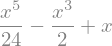

In [100]:
sp.expand(s1.removeO() * s2.removeO())

但请注意，这不是$\cos(x)\sin(x)$到$5$的正确扩展:

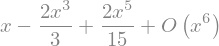

In [101]:
(sp.cos(x)*sp.sin(x)).series(x, 0, 6)

## 9. 线性代数

### 9.1 矩阵

使用 `Matrix` 定义矩阵：

In [56]:
m11, m12, m21, m22 = sp.symbols("m11, m12, m21, m22")
b1, b2 = sp.symbols("b1, b2")

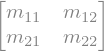

In [57]:
A = sp.Matrix([[m11, m12],[m21, m22]])
A

In [58]:
b = sp.Matrix([[b1], [b2]])
b

有`Matrix`，可以做常规的矩阵代数运算：

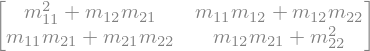

In [59]:
A**2

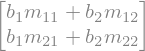

In [60]:
A * b

计算行列式和逆，诸如此类:

In [61]:
A.det()

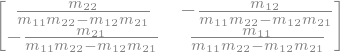

In [62]:
A.inv()

## 10. 求解方程

对于求解方程和方程组可以用 `solve` 函数：

In [78]:
sp.solve(x**2 - 1, x)

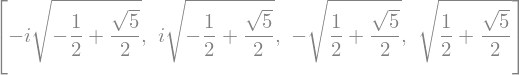

In [79]:
sp.solve(x**4 - x**2 - 1, x)

方程组：

In [112]:
sp.solve([x + y - 1, x - y - 1], [x,y])

在其他符号表达方面:

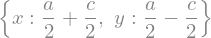

In [113]:
sp.solve([x + y - a, x - y - c], [x,y])

## 进一步学习

* http://sympy.org/en/index.html - The SymPy projects web page.
* https://github.com/sympy/sympy - The source code of SymPy.
* http://live.sympy.org - Online version of SymPy for testing and demonstrations.